In [3]:
import pandas as pd

# Load your dataset
file_path = '/content/fraud_dataset_example.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [4]:
# Sample 10% of the data randomly without replacement
df_sampled = df.sample(frac=0.1, random_state=42)  # 'frac=0.1' means 10%

# Display the size of the original and sampled data
print("Original size:", df.shape)
print("Sampled size:", df_sampled.shape)


Original size: (101613, 11)
Sampled size: (10161, 11)


In [6]:
# Identifying non-numeric columns
non_numeric_columns = df_sampled.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [7]:
# Threshold for the number of unique values
threshold = 10  # This can be adjusted

# Columns for one-hot encoding and label encoding
one_hot_columns = [col for col in non_numeric_columns if df[col].nunique() <= threshold]
label_columns = [col for col in non_numeric_columns if df[col].nunique() > threshold]

print("One-Hot Columns:", one_hot_columns)
print("Label Columns:", label_columns)


One-Hot Columns: ['type']
Label Columns: ['nameOrig', 'nameDest']


In [10]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Applying one-hot encoding
df_one_hot = pd.get_dummies(df_sampled, columns=one_hot_columns)

# Applying label encoding
label_encoder = LabelEncoder()
for col in label_columns:
    df_one_hot[col] = label_encoder.fit_transform(df_sampled[col])

print(df_one_hot.head())


       step     amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
690       1   51749.94      2308            0.0             0.0      2680   
46856     9   30045.04      2827        11857.0             0.0      5111   
87115    10   12322.60      4860            0.0             0.0      4458   
57005     9   29258.52      7188            0.0             0.0       859   
40495     9  220822.63      5150        13152.0             0.0      1182   

       oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  type_CASH_IN  \
690          62470.00       132842.64        0               0             0   
46856            0.00            0.00        0               0             0   
87115            0.00            0.00        0               0             0   
57005       320756.62       212090.50        0               0             0   
40495       157820.88       392254.05        0               0             0   

       type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRA

In [11]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize the data (excluding the encoded categorical columns)
scaled_data = scaler.fit_transform(df_one_hot)

# Convert the scaled data back to DataFrame for convenience
df_scaled = pd.DataFrame(scaled_data, columns=df_one_hot.columns)
print(df_scaled.head())


       step    amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0 -4.083758 -0.360588 -0.945034      -0.324164       -0.325093 -0.433543   
1  0.273251 -0.425891 -0.768096      -0.319753       -0.325093  0.609938   
2  0.817877 -0.479212 -0.075003      -0.324164       -0.325093  0.329645   
3  0.273251 -0.428258  0.718662      -0.324164       -0.325093 -1.215188   
4  0.273251  0.148096  0.023864      -0.319272       -0.325093 -1.076544   

   oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  type_CASH_IN  \
0       -0.338034       -0.368579 -0.029775             0.0     -0.499046   
1       -0.364321       -0.416640 -0.029775             0.0     -0.499046   
2       -0.364321       -0.416640 -0.029775             0.0     -0.499046   
3       -0.229347       -0.339909 -0.029775             0.0     -0.499046   
4       -0.297910       -0.274728 -0.029775             0.0     -0.499046   

   type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0       1.488116   -

In [12]:
from scipy.linalg import svd

# Applying SVD
U, s, Vt = svd(df_scaled)

# Display the first few singular values to decide how many dimensions to keep
print("Singular values:", s[:10])


Singular values: [182.79053037 159.07032842 128.67264335 115.66502139 107.08483305
 101.66152538 100.00433852  93.78759176  84.781099    60.71534122]


In [19]:
# Checking the shapes of U, S, and Vt
print("Shape of U:", U.shape)
print("Shape of S:", s.shape)
print("Shape of Vt:", Vt.shape)

# Checking the number of components
print("Number of components:", num_components)


Shape of U: (10161, 10161)
Shape of S: (15,)
Shape of Vt: (15, 15)
Number of components: 3


In [20]:
# Extracting the top components
U_reduced = U[:, :num_components]
s_reduced = s[:num_components]

# Creating a reduced representation
# We use only the left singular vectors (U) and the top singular values
df_reduced_representation = U_reduced * s_reduced

# Converting to DataFrame
df_reduced_representation_df = pd.DataFrame(df_reduced_representation, columns=[f'Component_{i+1}' for i in range(num_components)])
print(df_reduced_representation_df.head())


   Component_1  Component_2  Component_3
0    -0.144676     0.605686     1.057233
1    -1.677531    -0.133642    -0.435429
2    -1.545112    -0.087622    -0.254843
3     0.451437     0.900322     1.971393
4     0.564426     1.021763     1.782122


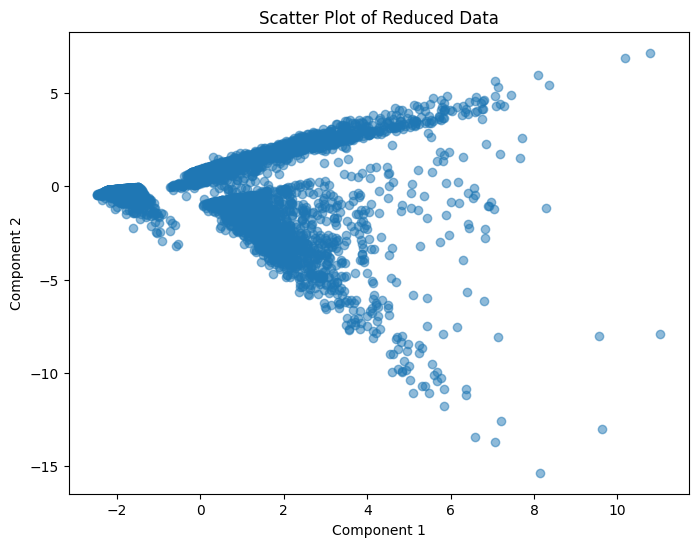

In [21]:
import matplotlib.pyplot as plt

# Visualizing the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(df_reduced_representation_df['Component_1'], df_reduced_representation_df['Component_2'], alpha=0.5)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Scatter Plot of Reduced Data')
plt.show()


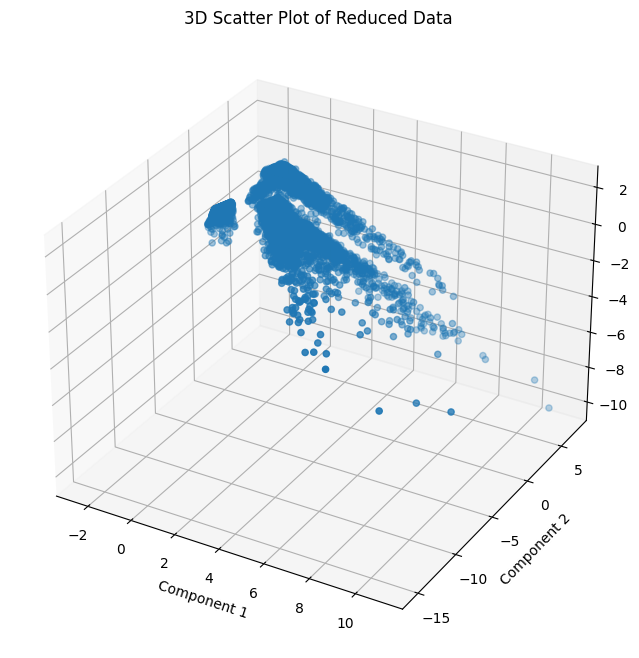

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_reduced_representation_df['Component_1'], df_reduced_representation_df['Component_2'], df_reduced_representation_df['Component_3'])
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('3D Scatter Plot of Reduced Data')
plt.show()


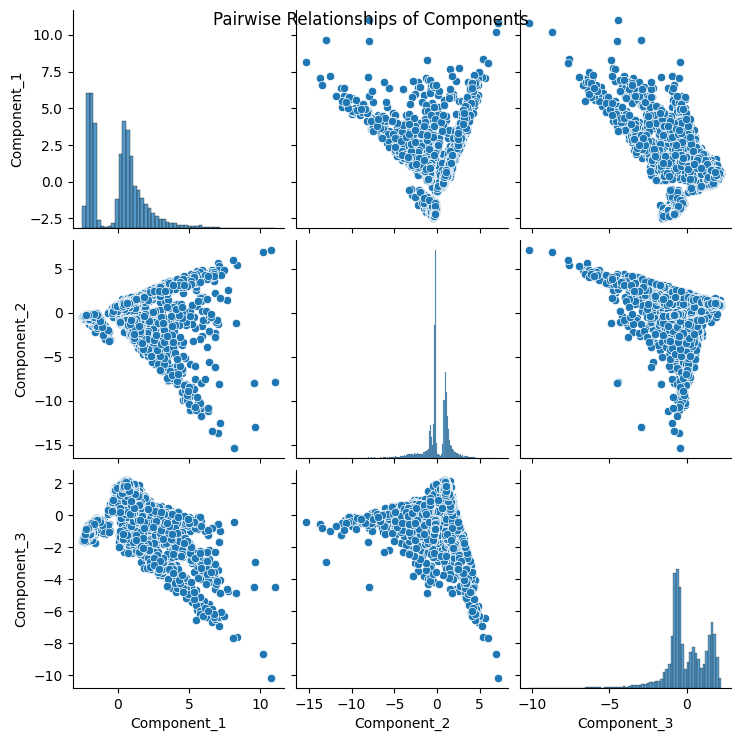

In [24]:
import seaborn as sns

sns.pairplot(df_reduced_representation_df)
plt.suptitle('Pairwise Relationships of Components')
plt.show()


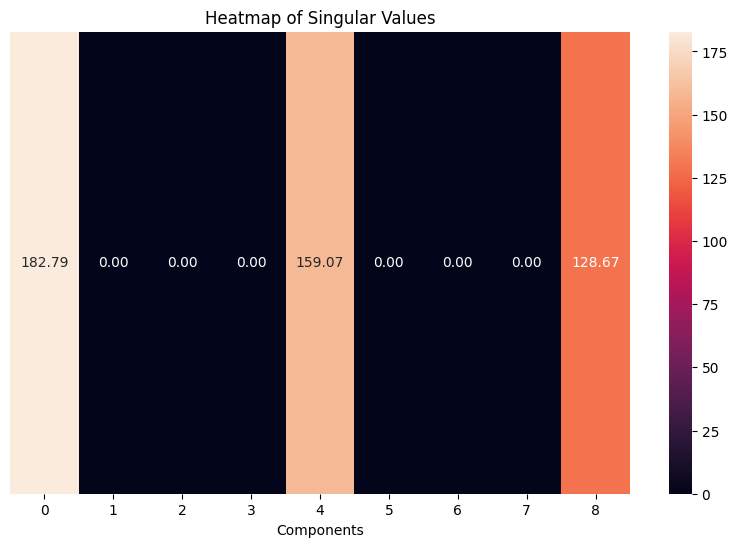

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(np.diag(s_reduced).reshape(1, -1), annot=True, fmt=".2f")
plt.title("Heatmap of Singular Values")
plt.xlabel("Components")
plt.yticks([], [])
plt.show()


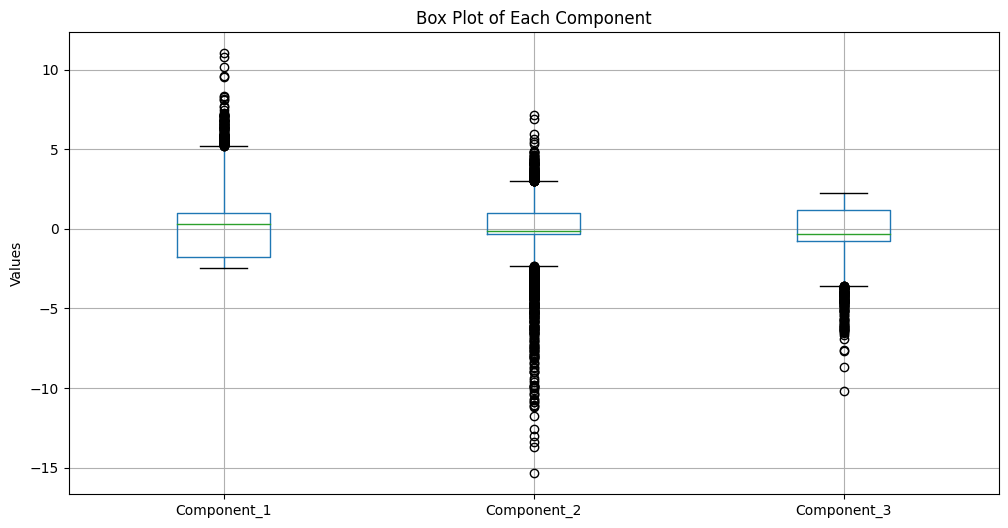

In [26]:
plt.figure(figsize=(12, 6))
df_reduced_representation_df.boxplot()
plt.title('Box Plot of Each Component')
plt.ylabel('Values')
plt.show()
